Pull the CSV output of `src/parse_settlements.py` from the DVC remote server on Azure where it has been conveniently pushed.  

Alternatively, one could run `src/download_GRID3_data.py` and `src/parse_settlements.py` oneself, but that will take awhile, since it includes downloading a 3 GB file and parsing GeoJSON settlement extents into lat/lon centroids.

In [1]:
!dvc pull parse

  0% Transferring|                                   |0/1 [00:00<?,     ?file/s]
!
  0%|          |test-azcopy-blob/files/md5/63/2505f0.00/? [00:00<?,        ?B/s]
100% Transferring|███████████████████████████████|1/1 [00:00<00:00,  1.19file/s]
Checkout                                              |0.00 [00:00,     ?file/s]
!
  0%|          |/workspaces/epipack-spatial-demo/.d0.00/? [00:00<?,        ?B/s]
  0%|          |/workspaces/epipack-spatial-dem0.00/14.8M [00:00<?,        ?B/s]
A       data/parsed/Jigawa_population_locations.csv                    
1 file added and 1 file fetched


Plot the lat/lon locations + populations of the settlements within the Nigerian state specified in `params.yaml`

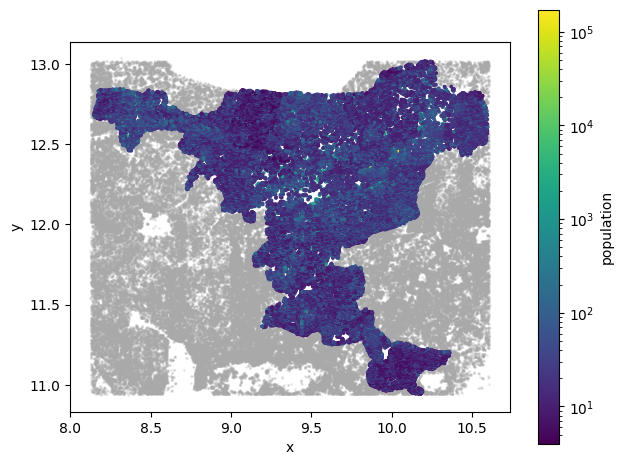

In [2]:
%run src/plot_locations.py

Configure a nearest-neighbor network between settlements according to the Nigerian state + kNN parameter specified in `params.yaml`

In [3]:
%run src/configure_network.py

/home/codespace/.python/current/lib/python3.10/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 7 disconnected components.
  warnings.warn(message)


In [2]:
import os
import yaml
import netwulf as nw

state = yaml.safe_load(open("params.yaml"))["state"]
network, _, __ = nw.load(os.path.join('data', 'configured', f"{state}_knn_graph.json"))

# stylized_network, config = nw.visualize(network)  # this is opening 2 netwulf interactive windows: one with our graph + another with default Les Mis characters?!
# nw.draw_netwulf(stylized_network)

In [4]:
%run src/simulate_SIRS.py

ImportError: Library "GL" not found.